# Reproduce ablation figures 

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## reproduction of figures for number of heads

In [61]:
def ablation_epochs_vs_heads(ablation_path, reconstructed=False, image_idx=0, save_img=True):
    basepath = Path(ablation_path)

    nheads = [1,2,4,8]
    epochs = [0,1,2,3]

    image_rows = []
    for nhead in nheads:
        image_row = []
        for epoch in epochs:
            if reconstructed:
                image_path = basepath / f"h{nhead}" / f"{epoch}" / "40" / "reconstructed" / f"test_{image_idx}_19_ngen40_reconstructed.png"
            else:
                image_path = basepath / f"h{nhead}" / f"{epoch}" / "40" / "edited" / f"test_{image_idx}_19_ngen40_edited.png"

            # read image
            image_array = np.array(Image.open(image_path).convert('RGB'))

            image_row.append(image_array)
        row = np.concatenate(image_row, axis=0)
        image_rows.append(row)
    
    # add conv
    # basepath = Path("/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation")
    # image_row = []
    # for epoch in epochs:
    #     image_path = basepath / "conv_orig" / f"{epoch}" / "40" / "edited" / f"test_{image_idx}_19_ngen40_edited.png"
    #     image_array = np.array(Image.open(image_path).convert('RGB'))
    #     image_row.append(image_array)
        

    # row = np.concatenate(image_row, axis=0)
    # image_rows.append(row)

    image_grid = np.concatenate(image_rows, axis=1)

    fig,ax = plt.subplots(1)
    ax.set_xticks([256] * np.arange(5) + 128, ("1","2","4","8", "conv"))
    ax.set_yticks([256] * np.arange(4) + 128, ("1","2","3","4"))

    ax.set_ylabel('epochs')
    ax.set_xlabel('nheads')
    plt.imshow(image_grid)
    
    if save_img:
        if reconstructed:
            plt.savefig(str( Path("..") / ".." / "figures" / "ablation" / f"epochs_vs_heads_img{image_idx}_recon.png"), bbox_inches='tight', pad_inches=0, dpi=300)
        else:    
            plt.savefig(str( Path("..") / ".." / "figures" / "ablation" / f"epochs_vs_heads_img{image_idx}.png"), bbox_inches='tight', pad_inches=0, dpi=300)
    plt.show()

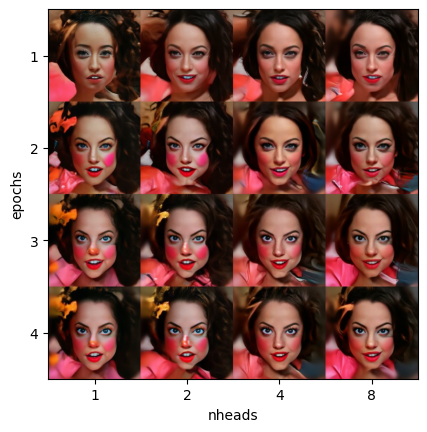

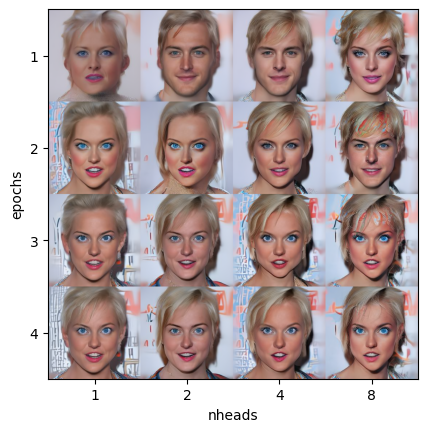

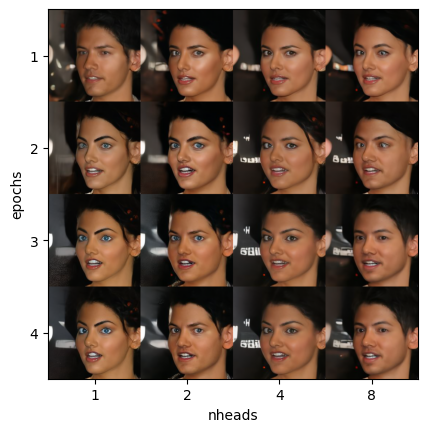

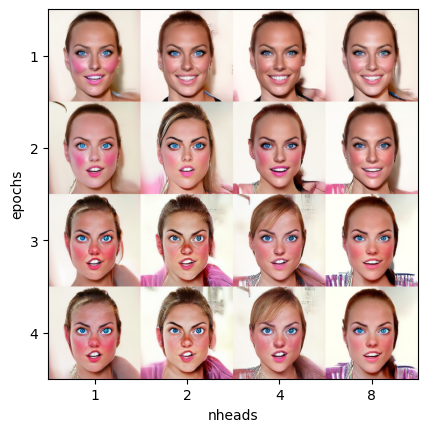

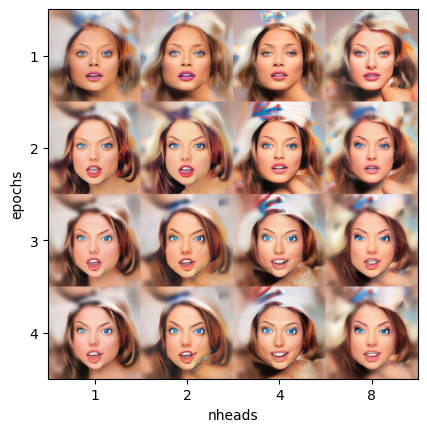

In [63]:
# path to folder containing ablation results
ablation_path = "/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/heads_ablation"

for i in range(5):
    ablation_epochs_vs_heads(ablation_path, image_idx=i, reconstructed=False, save_img=True)

## Reproduce figures for delta-h strength

In [46]:
def ablation_epochs_vs_deltas(basepath, image_idx=0, save_figure=True):
    basepath = Path(basepath)

    nheads = [1,2,4,8]

    image_cols = []
    for nhead in nheads:
        image_path = basepath / f"h{nhead}" / "40" / f"test_{image_idx}_19_ngen40.png"

        # read image
        image_array = np.array(Image.open(image_path).convert('RGB'))
        image_cols.append(image_array)

    # add conv
    # basepath = Path("/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/dstrength_ablation")
    # image_path = basepath / "conv" / "5" / "40"/ f"test_{image_idx}_19_ngen40.png"
    # image_array = np.array(Image.open(image_path).convert('RGB'))
    # image_cols.append(image_array)

    # add conv_orig
    basepath = Path("/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/dstrength_ablation")
    image_path = basepath / "conv_orig" / "0" / "40"/ f"test_{image_idx}_19_ngen40.png"
    image_array = np.array(Image.open(image_path).convert('RGB'))
    image_cols.append(image_array)
    
    image_grid = np.concatenate(image_cols, axis=1)

    fig,ax = plt.subplots(1)
    ax.set_xticks([256] * np.arange(5) + 128, ("1","2","4","8", "conv\norig"))

    # from script
    min_delta = 0
    max_delta = 1
    num_delta = 7
    strengths = np.linspace(min_delta, max_delta, num_delta)
    strengths = [f"{s:.3}" for s in strengths]
    ax.set_yticks([256] * np.arange(7) + 128, strengths)
    ax.set_ylabel('delta strength')
    ax.set_xlabel('nheads')
    plt.imshow(image_grid)
    
    if save_figure:
        plt.savefig(str( Path("..") / ".." / "figures" / "ablation" / f"dstrength_vs_heads_img{image_idx}.png"), bbox_inches='tight', pad_inches=0, dpi=300)

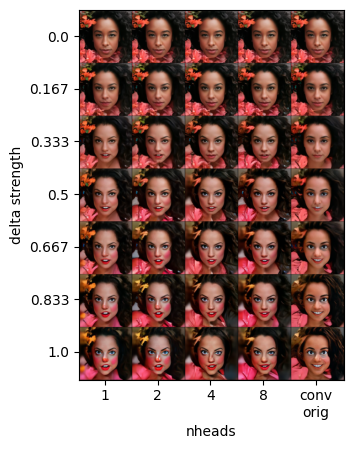

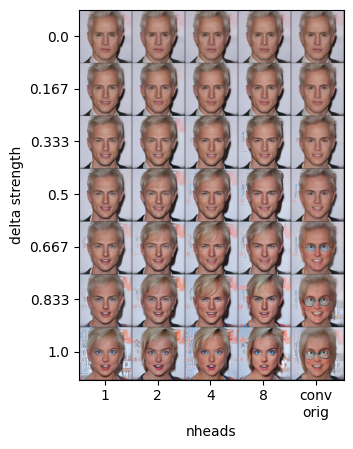

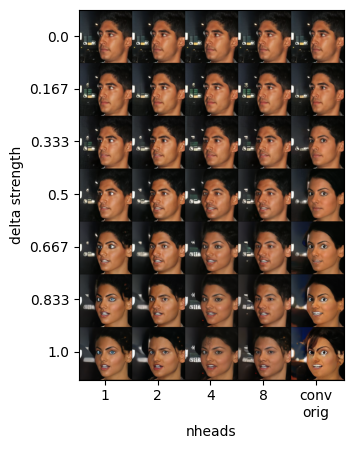

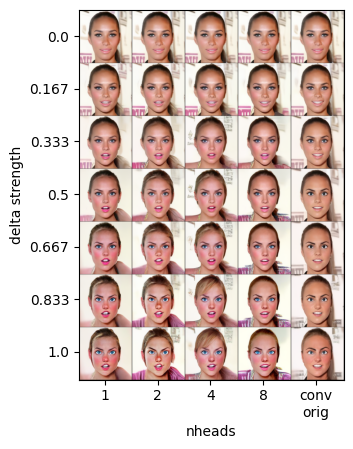

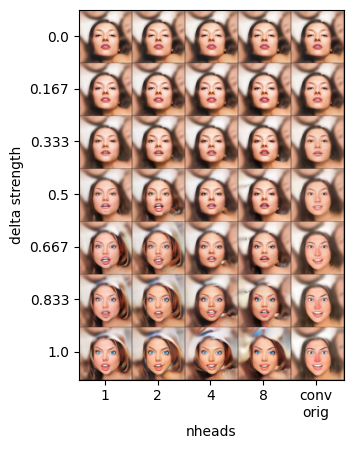

In [49]:

basepath = "/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/dstrength_ablation"
for i in range(5):
    ablation_epochs_vs_deltas(basepath, image_idx=i, save_figure=True)

## Reproduction of epochs vs layertype ablation

In [20]:
def ablation_epochs_vs_layer(basepath, save_figure=True, image_idx=0):
    basepath = Path(basepath)

    layertype = ['pc_transformer_simple', 'cp_transformer_simple', 'c_transformer_simple', 'p_transformer_simple', 'conv']
    # epochs = [0,1,2,3,4,5]
    epochs = [-1, 0,1,2,3]

    image_rows = []

    for layer in layertype:
        image_row = []
        # add original image
        image_path = basepath / f"{layer}" / "0" / "40" / "original" / f"test_{image_idx}_19_ngen40_original.png"
        image_array = np.array(Image.open(image_path).convert('RGB'))
        image_row.append(image_array)

        for epoch in epochs:
            #skip first epoch as its for original images
            if epoch == -1:
                continue

            image_path = basepath / f"{layer}" / f"{epoch}" / "40" / "edited" / f"test_{image_idx}_19_ngen40_edited.png"

            # read image
            image_array = np.array(Image.open(image_path).convert('RGB'))

            image_row.append(image_array)
        row = np.concatenate(image_row, axis=0)
        image_rows.append(row)
    image_grid = np.concatenate(image_rows, axis=1)

    plt.rc('xtick', labelsize=7)
    fig,ax = plt.subplots(1)
    layertype = [l.replace("_simple", "").replace("_", "-") for l in layertype]
    ax.set_xticks([256] * np.arange(len(layertype)) + 128, layertype)
    ax.set_yticks([256] * np.arange(len(epochs)) + 128, ("original", "1","2", "3", "4"))
    ax.set_ylabel('epochs')
    ax.set_xlabel('layer type')
    # for tick in ax.get_xticklabels():
    #     tick.set_rotation(45)
    
    plt.imshow(image_grid)
    if save_figure:
        plt.savefig(str(Path("..") / ".." / "figures" / "ablation" / f"epochs_vs_layer_img{image_idx}.png"), bbox_inches='tight', pad_inches=0, dpi=300)

    plt.show()

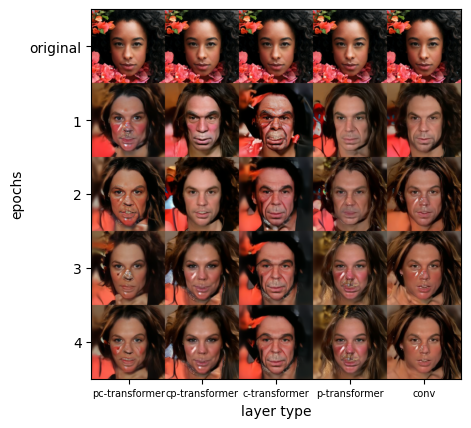

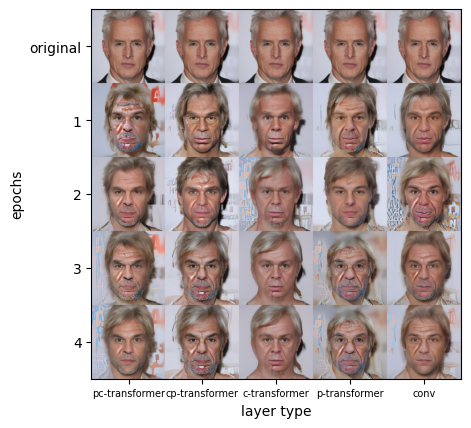

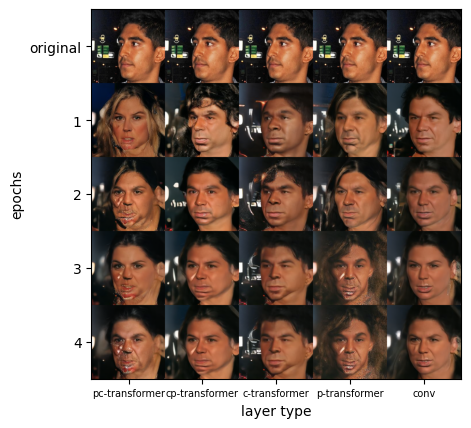

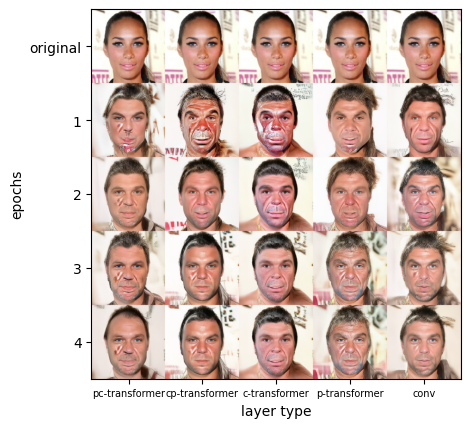

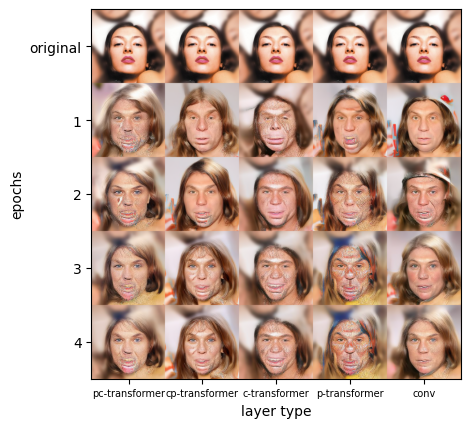

In [22]:
basepath = "/home/parting/master_AI/DL2/DL2-2023-group-15/src/eval_runs/layertype_ablation"

for i in range(5):
    ablation_epochs_vs_layer(basepath, image_idx=i, save_figure=True)

(259, 2314, 3) (259, 2314, 3)


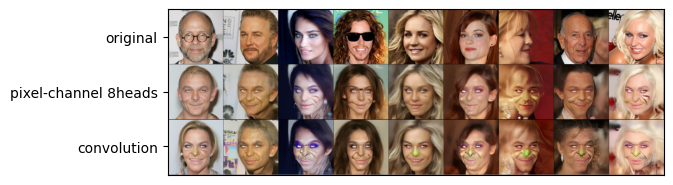

In [45]:
img0 = "/home/parting/master_AI/DL2/DL2-2023-group-15/figures/ablation/goblin_original.png"
img1 = "/home/parting/master_AI/DL2/DL2-2023-group-15/figures/ablation/goblin_pc_h8.png"
img2 = "/home/parting/master_AI/DL2/DL2-2023-group-15/figures/ablation/goblin_sgd.png"

path = str(Path("../../figures/ablation/") / "goblin_comparison.png")
# read image
img0_array = np.array(Image.open(img0).convert('RGB'))[:256]
img1_array = np.array(Image.open(img1).convert('RGB'))[:, :2314]
img2_array = np.array(Image.open(img2).convert('RGB'))[:, :2314]

print(img2_array.shape, img1_array.shape)
arr = np.concatenate([img0_array, img1_array, img2_array], axis=0)
fig, ax = plt.subplots(1)
plt.imshow(arr)
ax.set_yticks([256] * np.arange(3) + 128, ("original", "pixel-channel 8heads","convolution"))
ax.set_xticks([])
# plt.axis('off')
# plt.show()
plt.savefig(path, bbox_inches='tight', dpi=300)

# Plots for metrics

In [51]:
import json
import matplotlib.pyplot as plt
# write results to json file
with open("metrics.json", "r") as f:
    results = json.load(f)

In [52]:
layer_abl_results = [r for r in results.values() if "layertype_ablation" in r['ablation_name']]
layer_abl_results_3 = [r for r in layer_abl_results if "3" in r['epochs']]

def plot_metric(metric):
    fid_ers = []
    labels = []
    for res in layer_abl_results_3:
        fid_ers.append(res[metric])
        labels.append(res['ablation_name'].split("/")[-1])
    labels = [l.replace("_simple", "").replace("_", "-") for l in labels]

    plt.bar(labels, fid_ers)
    plt.title(metric)
    plt.show()


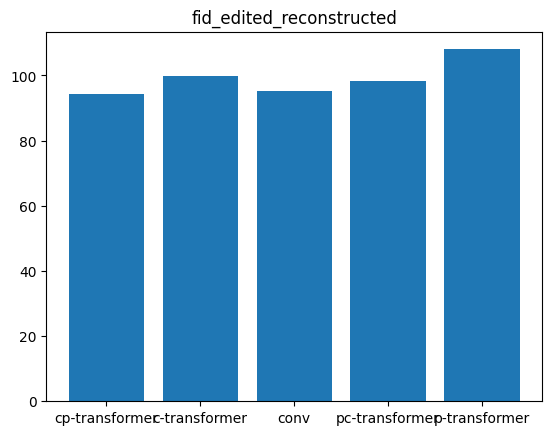

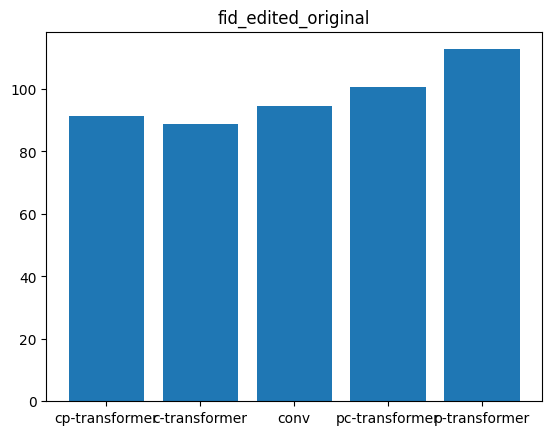

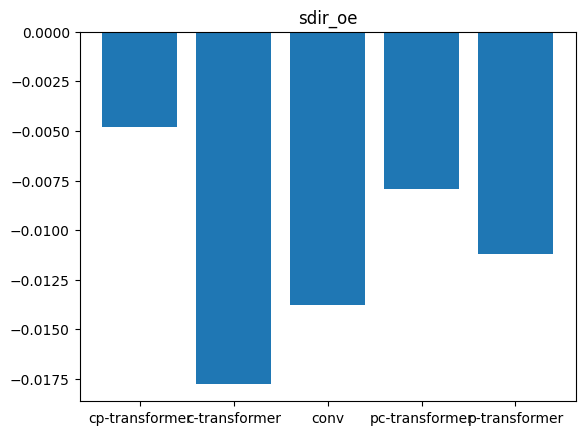

In [53]:
plot_metric("fid_edited_reconstructed")
plot_metric("fid_edited_original")
plot_metric("sdir_oe")


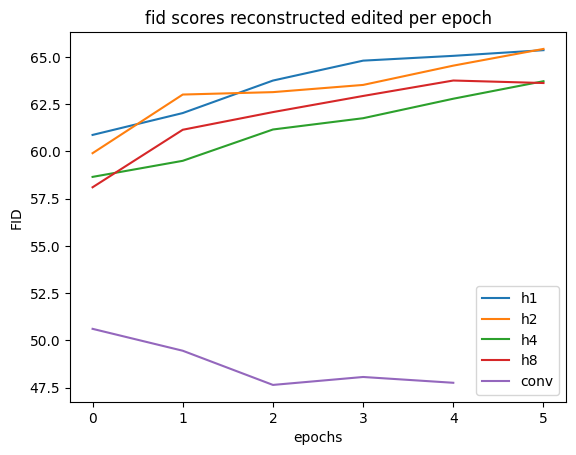

In [54]:
heads_abl_results = [r for r in results.values() if "heads_ablation" in r['ablation_name']]
# layer_abl_results = [r for r in layer_abl_results if "3" in r['epochs']]
for h in ['h1', 'h2', 'h4', 'h8', 'conv']:
    fid_er = [(entry['fid_edited_reconstructed'], entry['epochs']) for entry in heads_abl_results if h in entry['ablation_name']]
    fid_er = sorted(fid_er, key=lambda x: x[1])
    fid_er = [t[0] for t in fid_er]
    plt.plot(range(len(fid_er)), fid_er, label=h)


plt.title("fid scores reconstructed edited per epoch")
plt.xlabel("epochs")
plt.ylabel("FID")
plt.legend()
plt.show()

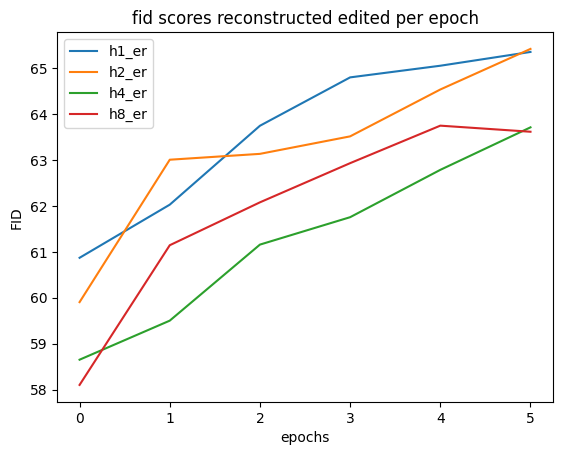

In [55]:
import matplotlib.pyplot as plt
heads_abl_results = [r for r in results.values() if "heads_ablation" in r['ablation_name']]

for h in ['h1', 'h2', 'h4', 'h8']:
    fid_er = [(results[k]['fid_edited_reconstructed'], results[k]['epochs']) for k in results.keys() if h in k]

    fid_er = sorted(fid_er, key=lambda x: x[1])
    fid_er = [t[0] for t in fid_er]
    plt.plot(range(len(fid_er)), fid_er, label=h + "_er")

# for h in ['h1', 'h2', 'h4', 'h8']:
#     fid_er = [(results[k]['fid_edited_original'], results[k]['epochs']) for k in results.keys() if h in k]
#     fid_er = sorted(fid_er, key=lambda x: x[1])
#     fid_er = [t[0] for t in fid_er]
#     plt.plot(range(len(fid_er)), fid_er, label=h+ "_eo")

# fid_eo = [(results[key]['fid_edited_original'], results[key]['epochs']) for key in results.keys()]
# fid_eo = sorted(fid_eo, key=lambda x: x[1])
# fid_eo = [t[0] for t in fid_eo]

# plt.plot(range(len(fid_eo)), fid_eo)
plt.title("fid scores reconstructed edited per epoch")
plt.xlabel("epochs")
plt.ylabel("FID")
plt.legend()
plt.show()